In [44]:
import pandas as pd
import geopandas as gpd
import sklearn
import contextily as ctx
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 200)

pc_gdf = gpd.read_file('./georef-netherlands-postcode-pc4/')
pc_gdf.pc4_code = pc_gdf.pc4_code.astype(str)
pc_gdf['kmarea'] = pc_gdf.to_crs(pc_gdf.estimate_utm_crs()).area / 10e6 # to Km2

In [95]:
df = pd.read_csv('./ODiN 2021/ODiN2021_Databestand.csv', sep=';', encoding= 'unicode_escape')
df.VertPC = df.VertPC.astype(str)
df.WoPC = df.WoPC.astype(str)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
OP,196768.0,3.409243e-01,4.740212e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
OPID,196768.0,6.522260e+10,4.958092e+08,6.234411e+10,6.519971e+10,6.529256e+10,6.538544e+10,6.824258e+10
Steekproef,196768.0,2.179140e+00,2.302768e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
Mode,196768.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
HHPers,196768.0,2.805019e+00,1.382716e+00,1.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00,1.000000e+01
HHSam,196768.0,2.598207e+00,1.272368e+00,1.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,8.000000e+00
HHPlOP,196768.0,2.854346e+00,9.719928e-01,1.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,5.000000e+00
HHLft1,196768.0,1.634412e-01,4.763898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00
HHLft2,196768.0,2.798575e-01,6.221147e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00
HHLft3,196768.0,2.966133e-01,6.388583e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00


In [13]:
df.OPID.value_counts()

OPID
65323474257    30
65227197402    25
65444238012    21
65448029560    19
65227256736    18
               ..
65264962842     1
65264960982     1
65326905833     1
65196313435     1
65320124149     1
Name: count, Length: 67083, dtype: int64

In [100]:
df.groupby(['KMotiefV']).size()

KMotiefV
1    26363
2     5769
3     6474
4    39668
5    11078
6    18010
7    26929
8    23845
9    21966
dtype: int64

In [111]:
df = df[(df.VertPC != 'nan') & (df.VertPC != '0.0') & (df.KRvm != '#NULL!')]
gdf = pd.merge(df, pc_gdf, left_on='WoPC', right_on='pc4_code')
gdf.head(3)

,OP,OPID,Steekproef,Mode,HHPers,HHSam,HHPlOP,HHLft1,HHLft2,HHLft3,HHLft4,WoPC,WoGem,Sted,GemGr,Prov,Corop,BuurtAdam,MRA,MRDH,Utr,Geslacht,Leeftijd,KLeeft,Herkomst,BetWerk,OnbBez,MaatsPart,Opleiding,HHBestInkG,HHGestInkG,HHLaagInk,HHSocInk,HHWelvG,HHRijbewijsAu,HHRijbewijsMo,HHRijbewijsBr,OPRijbewijsAu,OPRijbewijsMo,OPRijbewijsBr,HHAuto,HHAutoL,OPAuto,BrandstofPa1,XBrandstofPa1,BrandstofEPa1,BouwjaarPa1,KBouwjaarPa1,KGewichtPa1,TenaamPa1,...,SPlaats1,SPlaats2,SPlaats3,SPlaats4,SPlaats5,AfstS,AfstSBL,SVvm1,SVvm2,SVvm3,SVvm4,SBegUur,SBegMin,SEindUur,SEindMin,CorrVerpl,GehBLVer,Rit,RitID,RitNr,AfstR,AfstRBL,KAfstR,Rvm,RvmRol,RAantIn,KRvm,RVertUur,RVertMin,RAankUur,RAankMin,RReisduur,RReisduurBL,RVertStat,RAankStat,RTSamen,RCorrSnelh,RVliegVer,FactorH,FactorP,FactorV,pc4_code,year,gem_code,prov_code,prov_name,gem_name,geometry,kmarea,kmarea_bin
0,1,62344107254,1,1,3,3,3,1,0,0,2,1363,34,2,7,5,40,0,15,18,21,2,38,9,1,3,0,2,4,10,10,8,9,9,2,0,2,1,0,1,2,1,1,2,0,0,2011,2,3,1,...,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,1,623441072540101,1,75,0,7,1,2,3,2,16,0,16,15,15,0,0.0,0.0,13,0,0,94,188,68606,1363,2020,34,24,Flevoland,Almere,"POLYGON ((5.16482 52.36641, 5.16486 52.36641, ...",0.368047,"(-0.0135, 0.675]"
1,0,62344107254,1,1,3,3,3,1,0,0,2,1363,34,2,7,5,40,0,15,18,21,2,38,9,1,3,0,2,4,10,10,8,9,9,2,0,2,1,0,1,2,1,1,2,0,0,2011,2,3,1,...,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,1,623441072540201,1,75,0,7,1,2,3,2,19,45,20,0,15,0,0.0,0.0,13,0,0,94,188,68606,1363,2020,34,24,Flevoland,Almere,"POLYGON ((5.16482 52.36641, 5.16486 52.36641, ...",0.368047,"(-0.0135, 0.675]"
2,1,62381778764,4,1,2,6,4,0,1,0,1,1363,34,2,7,5,40,0,15,18,21,2,11,2,1,5,9,4,7,4,4,8,8,3,1,0,1,0,0,0,1,0,0,1,0,0,2011,2,2,2,...,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,1,623817787640101,1,101,0,8,1,2,4,2,12,30,12,45,15,0,0.0,0.0,13,0,0,102,204,74623,1363,2020,34,24,Flevoland,Almere,"POLYGON ((5.16482 52.36641, 5.16486 52.36641, ...",0.368047,"(-0.0135, 0.675]"


In [123]:
KRvm_t = {
    '1': "Personenauto - bestuurder",
    '2': "Personenauto - passagier",
    '3': "Trein",
    '4': "Bus/tram/metro",
    '5': "Fiets",
    '6': "Te voet",
    '7': "Overig",
}

In [124]:
gdf['KRvmT'] = gdf.KRvm.replace(KRvm_t)
gdf[['KMotiefV', 'KRvmT', 'kmarea', 'kmarea_bin']]

,KMotiefV,KRvmT,kmarea,kmarea_bin
0,6,Personenauto - passagier,0.368047,"(-0.0135, 0.675]"
1,6,Personenauto - passagier,0.368047,"(-0.0135, 0.675]"
2,6,Personenauto - passagier,0.368047,"(-0.0135, 0.675]"
3,6,Personenauto - passagier,0.368047,"(-0.0135, 0.675]"
4,4,Personenauto - bestuurder,0.368047,"(-0.0135, 0.675]"
...,...,...,...,...
179189,9,Personenauto - passagier,0.601821,"(-0.0135, 0.675]"
179190,9,Personenauto - passagier,0.601821,"(-0.0135, 0.675]"
179191,4,Personenauto - bestuurder,0.376850,"(-0.0135, 0.675]"
179192,4,Personenauto - bestuurder,0.376850,"(-0.0135, 0.675]"


In [ ]:
gdf[['KMotiefV', 'KRvmT', 'kmarea', 'kmarea_bin']]

<Axes: >

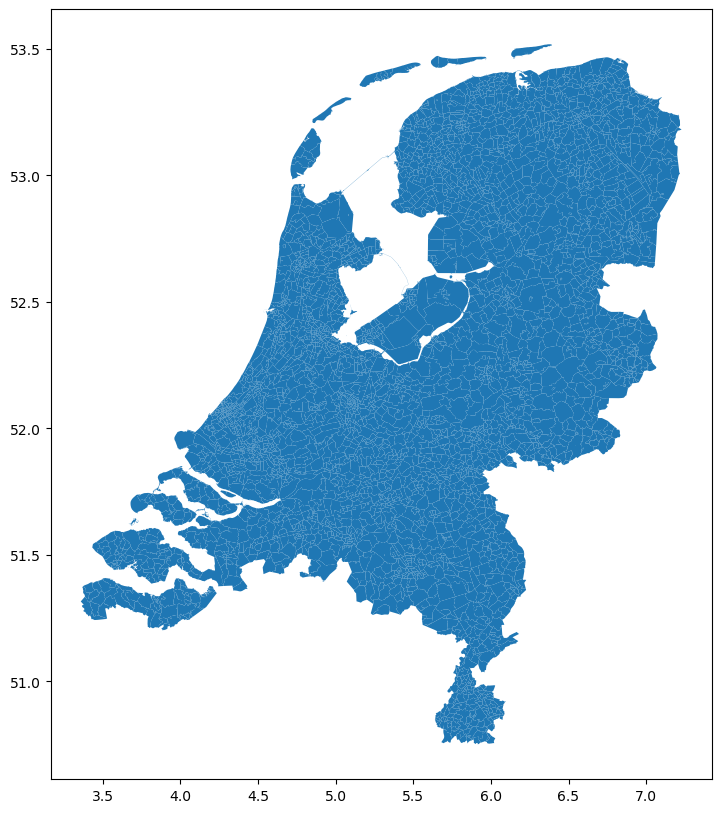

In [20]:
fig, ax = plt.subplots(figsize=(10,10))
pc_gdf.plot(ax=ax)